## Pandas holistic Guide

Basic data extraction
* basic pandas in cell formation
* read(csv, excel, pdf*)
* exam data
* basic statistics
* work na, duplication
* select row, column, condition
* group by
* join
* sort
* reshape(transpose)
* write(csv, excel, pdf*)

Data creation and modification
* create a dataframe
* convert list/dict/np.series to dataframe
* create/insert new column/row
* fill a column with data
* combine dataframe (vertical, horizontal)
* modify a cell/column/row
* delete a cell/column/row

Basic data ploting (pandas built-in & matplotlib)
* bar chart
* line chart


miscellaneous
* timeseries
* play with strings
* regular expression
* play with index
* Play with Na, NaN


Useful links

In [1]:
import numpy as np, pandas as pd

In [2]:
titanic = pd.read_csv("https://raw.githubusercontent.com/jorisvandenbossche/pandas-tutorial/master/data/titanic.csv")


### Basic data extraction

#### basic pandas in cell formation

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))  # change matplotlib figure size

#### read(csv, excel, pdf*)

In [28]:
# 1 titanic data
titanic = pd.read_csv("https://raw.githubusercontent.com/jorisvandenbossche/pandas-tutorial/master/data/titanic.csv")
titanic = pd.read_excel('titanic.xlsx', sheet_name='passengers')
# 2 air quality data
air_quality = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_long.csv",
                         index_col = "date.utc",
                         parse_dates = True)
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


#### exam data

In [ ]:
titanic.describe()    # basic satistics of numerical datab
titanic.head(10)      # first 10 rows
titanic.tail(10)      # last 10 rows
titanic.dtypes        # column data types: integer(int64), floats(floats63), string(object)
                      # When asking for the dtypes, no brackets are used! dtypes is an attribute of a DataFrame and Series.
titanic.shape         # Same to dtypes
titanic.info()        # technical summary: column, entries, null value, dtypes, memory     

titanic["Name"].unique()   # Get unique values for a column, result is a np arraya

#### Basic Statistics

In [ ]:
titanic["Age"].mean()
titanic[["Age", "Fare"]].median()
titanic.agg({Age': ['min', 'max', 'median', 'skew'],
              'Fare': ['min', 'max', 'median', 'mean']})

#### Work with na and duplication

Before you compare values, you should know:

```python
np.nan != np.nan
```

In [ ]:
# show rows with nan
df[df[col].isnull()]

# show duplicates
df[df.duplicated(subset=['Acol', 'Bcol'])]

|  Method  |  Action   |
| --- | --- |
| pad / ffill | Fill values forward |
| bfill / backfill | Fill values backward |

In [ ]:
# fill na
df.fillna(0) # fill with 0
df.fillna(method='ffill')  # propagate non-null values forward or backward

values = {'A': 0 , 'B' : 2, 'C' : 3, 'D' : 4}  # fill columns with certain value
df.fillna(value = values)

# create na
np.nan  # to all objects and numeric values
None   # to all numeric values

# fill white space in Acol with na
df.replace({ 'A': r'^\s*$'}, np.nan, regex=True)

# fill NA with a compute values 
df.where(pd.notna(df), df.mean(), axis='columns')


# fix duplication
df.drop_duplicates()  # keep first row
df.drop_duplicates(keep='last')   # keep last row
df.drop_duplicates(subset=['A', 'B'])  # identify duplicate rows based on specific columns


#### select row, column, condition

In [ ]:
# select columns
ages = titanic["Age"]
age_sex = titanic[["Age", "Sex"]]

# select rows
above_35 = titanic[titanic["Age"]>35]
class_23 = titanic[titanic["Pclass"].isin([2,3])]
class_23 = titanic[(titanic["Pclass"] == 2) | (titanic['Pclass']==3)]    # When combining multiple conditional statements, each condition must be surrounded by parentheses (). 
                                                                         # Moreover, you can not use or/and but need to use the or operator | and the and operator &.
age_no_na = titanic[titanic["Age"].notna()]    
    
# location
adult_names = titanic.loc[titanic['Age']>35, "Name"]    # loc[row_name, column_name], or both the part before and after the comma, you can use a single label, a list of labels, a slice of labels, a conditional expression or a colon.
titanic.ix[9:25, "Name"]    # Mix index with names using .ix[]
titanic.iloc[9:25, 2:5]     # iloc[row_index, column_index], can't use condition here.    
    
 

#### group by

In [ ]:
# As our interest is the average age for each gender, a subselection on these 
# two columns is made first: titanic[["Sex", "Age"]]. Next, the groupby() method 
# is applied on the Sex column to make a group per category. The average age for 
# each gender is calculated and returned.
titanic[["Sex","Age"]].groupby("Sex").mean()
titanic.groupby("Sex")["Age"].mean()

# What is the mean ticket fare price for each of the sex and cabin class combinations?
titanic.groupby(["Sex", "Pclass"])["Fare"].mean()

# What is the number of passengers in each of the cabin classes?
titanic["Pclass"].value_counts(dropna=True)
titanic.groupby("Pclass")["Pclass"].count()  # exclude NA value
titanic.groupby("Pclass")["Pclass"].size()   # include NA value

# more than one aggregation function
titanic.groupby("Pclass").agg({"Survived":'sum', "Sex":"count"})


# customized agg function: groupby.filter(func)
# Return a copy of a DataFrame excluding elements from groups that do not satisfy
# the boolean criterion specified by func
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar'],
                    'B' : [1, 2, 3, 4, 5, 6],
                    'C' : [2.0, 5., 8., 1., 2., 9.]})
grouped = df.groupby('A')
grouped.filter(lambda x: x['B'].mean() > 3.)

#### join

The air quality measurement station coordinates are stored in a data file air_quality_stations.csv, downloaded using the py-openaq package.

```python
stations_coord = pd.read_csv("data/air_quality_stations.csv")
```

In [ ]:
air_quality = pd.merge(air_quality, stations_coord, how='left', left_on='parameter', right_on='id')

#### Sort

In [ ]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()

#### reshape

In [29]:
# Create a subset of air quality data
# use 2 measurements (head) for each location (groupby)
no2_subset = air_quality[air_quality["parameter"] == "no2"].sort_index().groupby(["location"]).head(2)
no2_subset.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³


##### Long to wide format

In [30]:
# I want the values for the three stations as separate columns next to each other
# The pivot_table() function is purely reshaping of the data: a single value for each index/column combination is required.
no2_subset.pivot(columns="location", values="value")   

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


In [32]:
# I want the mean concentrations for NO2 and 𝑃𝑀2.5 in each of the stations in table form
air_quality.pivot_table(values="value", index="location",
                        columns="parameter", aggfunc="mean")
# pivot(): data is only rearranged
# pivot_table(): data is re arranged and aggregated, equalvent to groupby+unstack
air_quality.groupby(["parameter", "location"]).mean().unstack(0)


parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


##### Wide to long format

In [39]:
# prepare data
no2_pivoted = no2_subset.pivot(columns="location", values="value").reset_index()


In [47]:
# I want to collect all air quality 𝑁𝑂2 measurements in a single column (long format)
no_2 = no2_pivoted.melt(id_vars="date.utc",
                         value_vars=["BETR801",
                                     "FR04014",
                                     "London Westminster"],
                         value_name="NO_2",
                         var_name="id_location")    
# id_vars: pivot point
# value_vars: columns to melt together
# value_names: a custom column name for melted value column
# var_name: a custom column name for the melted column names, ie BETR801, FR04014, London Westminster


In [48]:
no_2

,date.utc,id_location,NO_2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,NaN
3,2019-04-09 01:00:00+00:00,FR04014,24.4
4,2019-04-09 02:00:00+00:00,FR04014,27.4
5,2019-04-09 03:00:00+00:00,FR04014,NaN
6,2019-04-09 01:00:00+00:00,London Westminster,NaN
7,2019-04-09 02:00:00+00:00,London Westminster,67.0
8,2019-04-09 03:00:00+00:00,London Westminster,67.0


##### Stacking and unstacking
* Work with multiIndex objects
    * Stack:  “pivot” a level of the (possibly hierarchical) column labels, returning a DataFrame with an index with a new inner-most level of row labels. **feels like to increase a level of index by transform wide to long**
    * unstack: (inverse operation of stack) “pivot” a level of the (possibly hierarchical) row index to the column axis, producing a reshaped DataFrame with a new inner-most level of column labels.  **feels like to unpacked a level by transforming long to wide**, you can choose unpacked level.

##### Pivot_table
The function pivot_table() can be used to create spreadsheet-style pivot tables. See the cookbook for some advanced strategies.



#### write(csv, excel, pdf*)

In [ ]:
titanic.to_csv('titanic.csv')
titanic.to_excel('titanic.xlsx', sheet_name=_name= 'passengers', index = False)

### Data creation and modification

In [20]:
air_quality = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2.csv",
                         index_col = 0,
                         parse_dates = True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


#### create a dataframe/series

In [ ]:
df = pd.DataFrame({"Name": ["Braund, Mr. Owen Harris", "Allen, Mr. William Henry","Bonnell, Miss. Elizabeth"],
              "Age": [22, 35, 58],
              "Sex": ["male", "male", "female"]})

In [ ]:
ages = pd.Series([22,35,58], name = "age")

#### convert list/dict/np.array to dataframe

In [ ]:
# convert a dict
pd.DataFrame(d.items(), columns= ["key", "value"])

# convert a list
People_List = ['Jon','Mark','Maria','Jill','Jack']
df = DataFrame (People_List,columns=['First_Name'])

# convert a list of lists -> very like to a 2D np array
People_List = [['Jon','Smith',21],['Mark','Brown',38],['Maria','Lee',42],['Jill','Jones',28],['Jack','Ford',55]]
df = DataFrame (People_List,columns=['First_Name','Last_Name','Age'])

# what if a column-alike list of lists?
People_List = [['Jon','Mark','Maria','Jill','Jack'],['Smith','Brown','Lee','Jones','Ford'],[21,38,42,28,55]]
df = DataFrame (People_List).transpose()
df.columns = ['First_Name','Last_Name','Age']

# From an unusual np.array
data = array([['','Col1','Col2'],['Row1',1,2],['Row2',3,4]])
df = pd.DataFrame(data=data[1:,1:],    # values
              index=data[1:,0],    # 1st column as index
              columns=data[0,1:])  # 1st row as the column names

#### create/insert new column/row

In [ ]:
# Derive a new column from an existing column
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882    # calculation is done element-wise

# Create a new column on top of a condition
# Method 1: df.apply(func, axis=1)
def f(row):
    if row["Pclass"] < 2:
        val = "Upper Class"
    elif row["Pclass"] = 2:
        val = "Middle Class"
    else:
        val = "Lower Class"
    return val
titanic["Class"] = titanic.apply(f,axis)
# You should either pass a column or a row to the func. Make sure you know what you're passing to the func.

# Method 2: df.loc[condition, new_column]
titanic.loc[titanic["Pclass"] < 2, "Class"] = "Upper Class"
titanic.loc[titanic["Pclass"] = 2, "Class"] = "Middle Class"
titanic.loc[titanic["Pclass"].isna(), "Class"] = "Lower Class"

# Insert a column to a loc: df.insert(loc, column, value) (This function modifies df inplace.)
titanic.insert(loc = 1, column = "record_type", value = [1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,])

In [ ]:
# Create a new row
new_row = pd.DataFrame(["Mike", "Male", 12, "Melbourne"], columns = ["Name", "Sex", "Age", "Birth Place"])

# Append to an existing df
df_contact = pd.concat([df_contact, new_row1, new_row2], axis = 0) # Method 1: concat
df_contact = df_contact.append([new_row1, new_row2], ignore_index=True, sort=False)

# Insert a row to a specific position is a bit complicated
# enlarge the df from the destinated position -> df.loc=new_row
def Insert_row(row_number, df, row_value): 
    # Starting value of upper half 
    start_upper = 0
   
    # End value of upper half 
    end_upper = row_number 
   
    # Start value of lower half 
    start_lower = row_number 
   
    # End value of lower half 
    end_lower = df.shape[0] 
   
    # Create a list of upper_half index 
    upper_half = [*range(start_upper, end_upper, 1)] 
   
    # Create a list of lower_half index 
    lower_half = [*range(start_lower, end_lower, 1)] 
   
    # Increment the value of lower half by 1 
    lower_half = [x.__add__(1) for x in lower_half] 
   
    # Combine the two lists 
    index_ = upper_half + lower_half 
   
    # Update the index of the dataframe 
    df.index = index_ 
   
    # Insert a row at the end 
    df.loc[row_number] = row_value 
    
    # Sort the index labels 
    df = df.sort_index() 
   
    # return the dataframe 
    return df 



#### fill a column with data

In [ ]:
# fill a column with data
titanic["weather"] = "sunny"
titanic.loc[:,"weather"] = "sunny"

# fill columns with data
# Method 1: Muliple assignments in one list
titanic["weather"], titanic["location"] = ["sunny", "370 miles south-southeast off the coast of Newfoundland"]
# Method 2: Let pd.DataFrame to expand the single row to match the index
titanic[["weather", 'location']] = pd.DataFrame([["sunny", "370 miles south-southeast off the coast of Newfoundland"]],
                                               index =  titanic.index)
# Method 3: create a new df with new columns and concatnate two dfs
new_df = pd.DataFrame([["sunny", "370 miles south-southeast off the coast of Newfoundland"]],
                                               index =  titanic.index,
                     columns = ["weather", "location"])
titanic = pd.concat([titanic, new_df], axis = 1)

# Method 4:Use .assign() with multiple column arguments
titanic = titanic.assign(weather = "sunny", location = "370 miles south-southeast off the coast of Newfoundland")

# Reference: 
# stackoverflow.com/questions/39050539/how-to-add-multiple-columns-to-pandas-dataframe-in-one-assignment

#### combine dataframe (vertical, horizontal)

In [ ]:
# air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)

#### modify a cell/column/row

In [ ]:
# rename
air_quality_renamed = air_quality.rename(columns={"station_antwerp": "BETR801",
              "station_paris": "FR04014",
              "station_london": "London Westminster"})

air_quality_renamed = air_quality_renamed.rename(columns=str.lower)
air_quality.columns = ["BETR801", "FR04014", "London Westminster"]

In [ ]:
titanic.iloc[0:3, 3] = 'anonymous'
titanic.loc[titanic['Age']>35, "Name"] = 'anonymous'

In [ ]:
# Reorder columns
cols = titanic.columns.tolist()
new_cols = [cols[-1],cols[-2]] + cols[:-2] # modified the order of cols
titanic = titanic[new_cols]

#### delete a cell/column/row

In [8]:
# drop a column
titanic.drop(["Age","Name"], axis=1)

# drop a row with index
titanic.set_index('Name', inplace=True)
titanic.drop("Braund, Mr. Owen Harris", axis = 0)

# drop a row with row number
titanic.drop(titanic.indxex[2,3])

# drop a row contains certain value
titanic[titanic.Name != "Braund, Mr. Owen Harris"]




### Basic data ploting (pandas built-in & matplotlib)

In [12]:
import matplotlib.pyplot as plt
air_quality = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2.csv",
                         index_col = 0,
                         parse_dates = True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


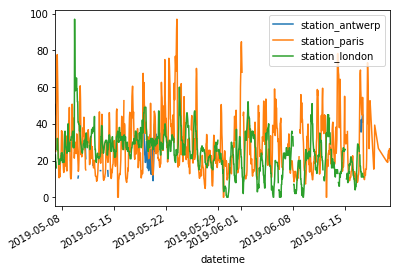

In [13]:
air_quality.plot()    # quick visual check

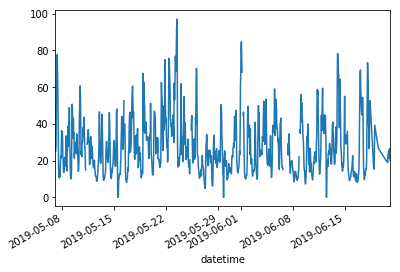

In [14]:
air_quality['station_paris'].plot()

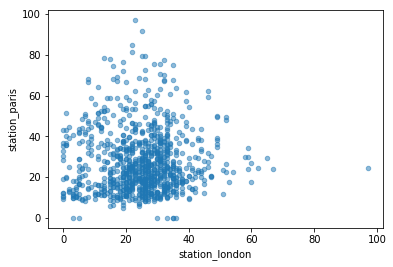

In [15]:
# Apart from the default line plot when using the plot function, a number of alternatives are 
air_quality.plot.scatter(x='station_london', y='station_paris', alpha = 0.5) 


In [16]:
[method_name for method_name in dir(air_quality.plot) if not method_name.startswith("_")]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

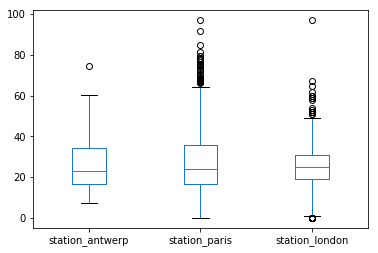

In [17]:
air_quality.plot.box()

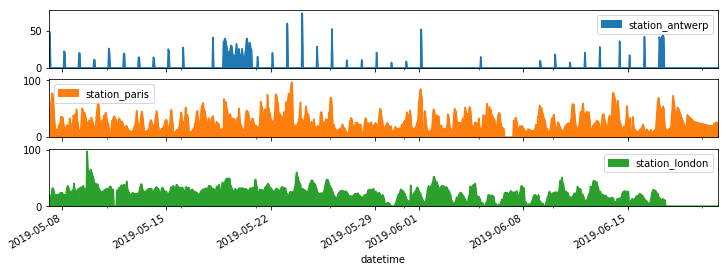

In [18]:
# Separate subplots for each of the data columns is supported by the subplots 
# argument of the plot functions. The builtin options available in each of the 
# pandas plot functions that are worthwhile to have a look.
axs = air_quality.plot.area(figsize=(12,4), subplots=True)

In [ ]:
# Alternatively, Each of the plot objects created by pandas are a matplotlib 
# object. As Matplotlib provides plenty of options to customize plots, making 
# the link between pandas and Matplotlib explicit enables all the power of 
# matplotlib to the plot. 
fig, axs = plt.subplots(figsize=(12, 4))        # Create an empty matplotlib Figure and Axes
air_quality.plot.area(ax=axs)                   # Use pandas to put the area plot on the prepared Figure/Axes
axs.set_ylabel("NO$_2$ concentration")          # Do any matplotlib customization you like
fig.savefig("no2_concentrations.png")           # Save the Figure/Axes using the existing matplotlib method.

### miscellaneous


#### timeseries

In [ ]:
# Parse datetime when read data
air_quality = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2_long.csv",
                         index_col = "date.utc",
                         parse_dates = ["date.utc"])

In [ ]:
# pd.to_dateime() convert strings to datetime64[ns, UTC] objects
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])

In [ ]:
# I want to add a new column to the DataFrame containing only the month of the measurement
air_quality["month"] = air_quality["datetime"].dt.month # year/weekofyear/quarter...


# in a groupby statement
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()


In [59]:
# Resample the timeseries to another frequency
# The resample() method is similar to a groupby operation:
#   1. it provides a time-based grouping, by using a string (e.g.D, M, 5H,…) that defines the target frequency
#   2. it requires an aggregation function such as mean, max,…
no_2 = air_quality.pivot(columns="location", values="value")
monthly_max = no_2.resample("M").max()
monthly_max

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


#### play with strings

In [ ]:
# lower
titanic["Name"].str.lower()
# split and get
titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)
# contains, return a series of True or False
titanic["Name"].str.contains("Countess")
# len
titanic["Name"].str.len()
# replace
titanic["Sex_short"] = titanic["Sex"].replace({"male": "M",
                                              "female": "F"})

#### Regular expression

#### play with index

##### Set index

In [ ]:
titanic.set_index(["Name","Pclass"])

##### reset index

In [ ]:
air_quality.reset_indexet(level = 0, inplace=True)

# After groupby, you need to reset index if you don't want let the groupby column to be the index
titanic.groupby("Pclass").sum().reset_index(level=0)

##### Ignore index

In [ ]:
# When append, make sure you know index column in both two dfs, 
# eg. if df don't have index column, new_row has index columns, you should add
# ignore_index=True when append, vice versa
df.append(new_row, ignore_index=True)

#### Play with NA, NaN

In [ ]:
titanic["Name"].isna()
titanic["Name"].notna()

#### Make a copy of your df?

In [ ]:
df.copy(deep=True)
# When deep = True, a new object will be created, Any modifications to the copy will
# not be relected in the original object
# When deep = False, the reverse/ vice versa anti

#### Tiling (cut to bins)

The `cut()` function computes groupings for the values of the input array and is often used to transform continuous variables to discrete or categorical variables:

In [9]:
ages = np.array([10, 15, 13, 12, 23, 25, 28, 59, 60])
pd.cut(ages, bins=3)

[(9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (26.667, 43.333], (43.333, 60.0], (43.333, 60.0]]
Categories (3, interval[float64]): [(9.95, 26.667] < (26.667, 43.333] < (43.333, 60.0]]

In [10]:
pd.cut(ages, bins=[0, 18, 35, 70])

[(0, 18], (0, 18], (0, 18], (0, 18], (18, 35], (18, 35], (18, 35], (35, 70], (35, 70]]
Categories (3, interval[int64]): [(0, 18] < (18, 35] < (35, 70]]

### split-apply-combine pattern
* Split the data into groups
* Apply a function to each group independently
* Combine the results into a data structure

### Useful links

[Getting started tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)

[Categorical data](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical)

[Working with Missing Data](https://pandas.pydata.org/docs/user_guide/missing_data.html)

[Reshaping and pivot tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-reshaping)

[MultiIndex / advanced indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced)

[Merge, join, and concatenate](https://pandas.pydata.org/docs/user_guide/merging.html#merging-concat)

[Comparison with SQL](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html#compare-with-sql-join)

[Time series / date functionality](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-overview)

[Time/date components](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-components)

[Offset aliases](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases)

[Highlight and Styling](https://pandas.pydata.org/docs/user_guide/style.html)

[Insert a row to a df](https://www.geeksforgeeks.org/insert-row-at-given-position-in-pandas-dataframe/)